# **Diminos Store - Delivery Time**

 Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("/content/diminos_data.csv")

Load Dataset

In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [ ]:
#Convert Time Columns to Datetime
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [ ]:
df["delivery_time"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60

In [ ]:
# Remove negative or zero delivery times
df = df[df["delivery_time"] > 0]

**Overall Delivery Time Statistics**

In [ ]:
mean_time = df["delivery_time"].mean()
median_time = df["delivery_time"].median()
p95_time = np.percentile(df["delivery_time"], 95)

mean_time, median_time, p95_time

(np.float64(20.499389326467778),
 15.797986066666667,
 np.float64(27.261043996666658))

Median (15.8 min) -Most orders are delivered fast

Mean (20.5 min) -Some late orders increase average

95th percentile (27.26 min) -95% of orders are delivered within 27.26 minutes

**KPI = Key Performance Indicator**

**KPI Check**

In [ ]:
if p95_time < 31:
    print(" SLA Met: 95th percentile < 31 minutes")
else:
    print("SLA Failed: 95th percentile ≥ 31 minutes")

 SLA Met: 95th percentile < 31 minutes


## KPI Evaluation – Diminos SLA

Dominos evaluates store performance using the 95th percentile of delivery time.
The SLA requires this value to be below 31 minutes.


**Delivery Time Distribution**

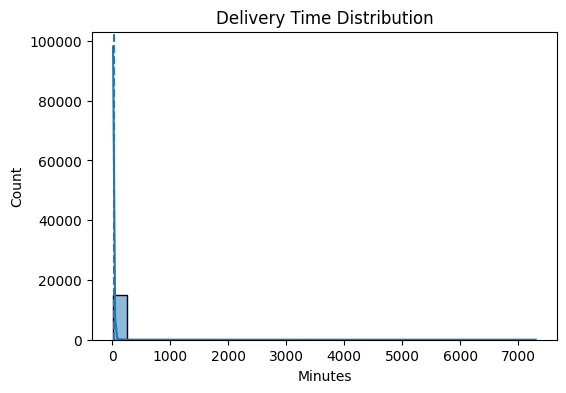

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["delivery_time"], bins=30, kde=True)
plt.axvline(31, linestyle="--")
plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.show()

**SLA = Service Level Agreement**

**Time-Based Analysis**

In [ ]:
#Extract Hour & Day
df["order_hour"] = df["order_placed_at"].dt.hour
df["order_day"] = df["order_placed_at"].dt.day_name()

In [ ]:
#95th Percentile by Hour
hourly_p95 = df.groupby("order_hour")["delivery_time"].quantile(0.95)
hourly_p95

,delivery_time
order_hour,
0,28.866990
1,32.104821
2,26.845717
3,25.617373
4,26.259762
5,23.924907
6,26.493076
7,27.154475
8,27.207707


## Hour-wise SLA Risk Analysis

This analysis identifies specific hours where delivery delays exceed the SLA.



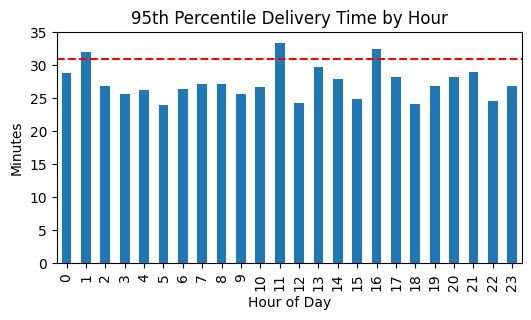

In [21]:
plt.figure(figsize=(6,3))
hourly_p95.plot(kind="bar")
plt.axhline(31, linestyle="--", color="red")
plt.title("95th Percentile Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Minutes")
plt.show()

#bottleneck hours

In [ ]:
#95th Percentile by Day
daily_p95 = df.groupby("order_day")["delivery_time"].quantile(0.95)
daily_p95

,delivery_time
order_day,
Friday,26.331713
Monday,28.737349
Saturday,26.935257
Sunday,26.517667
Thursday,26.534242
Tuesday,29.397539
Wednesday,26.442186


Delayed Orders (>31 minutes)

In [ ]:
delayed_orders = df[df["delivery_time"] > 31]
delayed_orders.shape

(557, 6)

The analysis shows that Kanav’s store meets Diminos’ SLA, with the 95th percentile delivery time at 27.26 minutes, well below the 31-minute threshold. However, certain hours experience delivery delays, indicating operational bottlenecks. Targeted staffing and process optimization during these periods will help sustain performance and prevent future risks.